In [1]:
import numpy as np
import matplotlib as plt

Exercise 1 : Solving the Equations - Use odient to solve the system of ODEs describing the coupled evolution of a and e over a time span of 10Gyr or until it merges. Use the following sets of initial conditions:
1. $m_1 = m_2 = 20M_o$ ; $a_o = 0.2$ AU and $e_o = 0.6$. This set represents a binary black hole where both components were prduced by the evolution of a massive star, similar to the gravitational wave sources detected by LIGO.
2. $m_1 = 1.8M_o$ and $m_2 = 2M_o$; $a_o = 0.05$ AU and $e_o = 0.1$
. This set represents a binary of two neutron stars as both objects have a mass above the Chandrasekhar limit, but below the Oppenheimer-Volkoff limit.
3. $m_1 = m_2 = 10^6 M_o$ ; $a_o = 0.0048$ pc and $e_o = 0.8$. This set represents a binary of two supermassive black holes, a target system for the future space-based gravitational wave detector LISA.

Do all three binaries merge by the end time of the simulation?

In [71]:
#initial conditions
Msun = 1.989e30 #kg
G = 6.67e-11
c = 3e8
AU = 1.5e11
pc = 3.08e16
Gyr = 1e9 * 365.25 * 24 * 3600

In [73]:
from scipy.integrate import odeint

In [78]:
def equation(y, t, m1, m2):
    a, e = y
    
    if a <= 0 or e < 0:
        return [0.0, 0.0]
        
    beta = G**3 * m1 * m2 * (m1 + m2) / c**5

    da_dt = (
        -64/5 * beta / (a**3 * (1 - e**2)**(7/2)) *
        (1 + 73/24 * e**2 + 37/96 * e**4)
    )
    de_dt = (
        -304/15 * e * beta / (a**4 * (1 - e**2)**(5/2)) *
        (1 + 121/304 * e**2)
    )
    return[da_dt, de_dt]

# Time array: 0–10 Gyr
t = np.linspace(0, 10 * Gyr, 20000)

# Binary systems
systems = [
    {
        "name": "Stellar-mass BH binary",
        "m1": 20 * Msun,
        "m2": 20 * Msun,
        "a0": 0.2 * AU,
        "e0": 0.6
    },
    {
        "name": "Neutron star binary",
        "m1": 1.8 * Msun,
        "m2": 2.0 * Msun,
        "a0": 0.05 * AU,
        "e0": 0.1
    },
    {
        "name": "Supermassive BH binary",
        "m1": 1e6 * Msun,
        "m2": 1e6 * Msun,
        "a0": 0.0048 * pc,
        "e0": 0.8
    }
]

# Run simulations
for s in systems:
    sol = odeint(
        equation,
        [s["a0"], s["e0"]],
        t,
        args=(s["m1"], s["m2"]),
        mxstep=5000
    )

    a = sol[:, 0]
    e = sol[:, 1]

    merged = np.any(a <= 1e6)  # ~1,000 km merger threshold

    print(f"\n{s['name']}")
    print(f"  Merges within 10 Gyr? {'YES' if merged else 'NO'}")


Stellar-mass BH binary
  Merges within 10 Gyr? YES

Neutron star binary
  Merges within 10 Gyr? NO

Supermassive BH binary
  Merges within 10 Gyr? YES


Exercise 2 - Make a plot showing the evolution of a and e vs time for each of the three cases. Make sure to label your figures and include units.

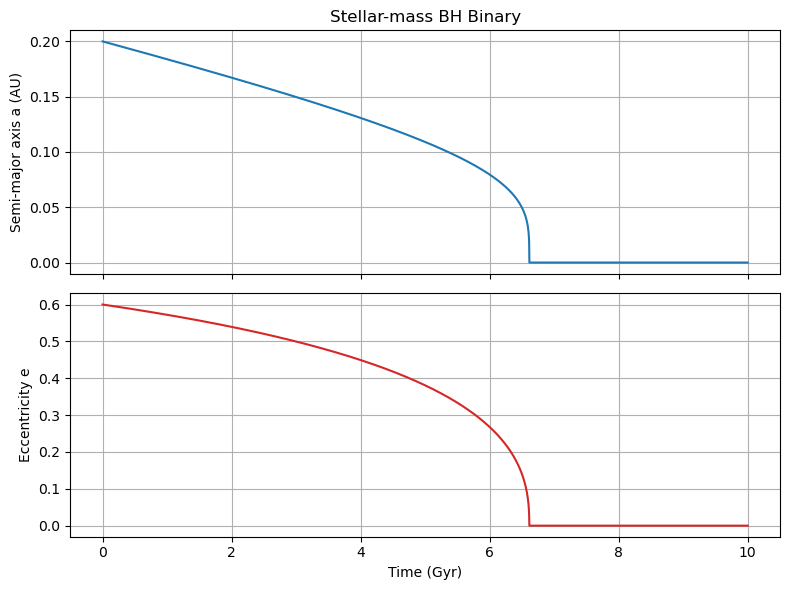

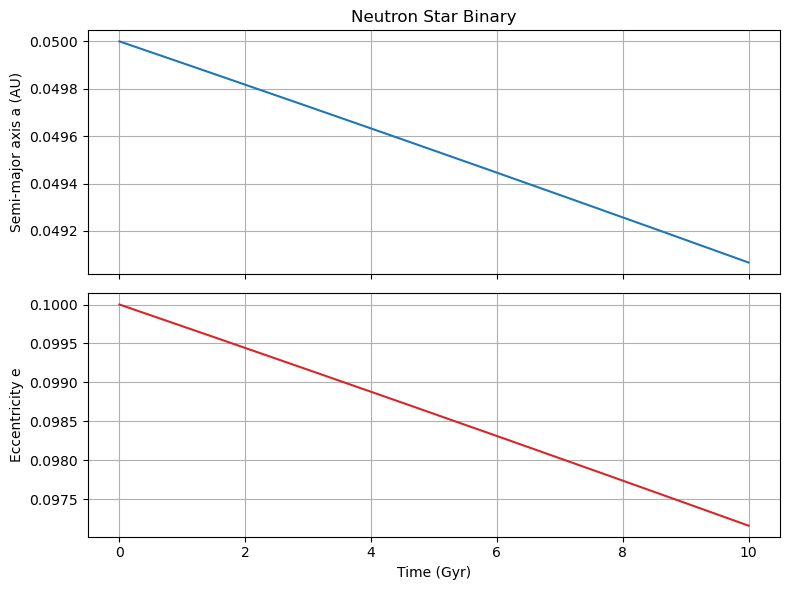

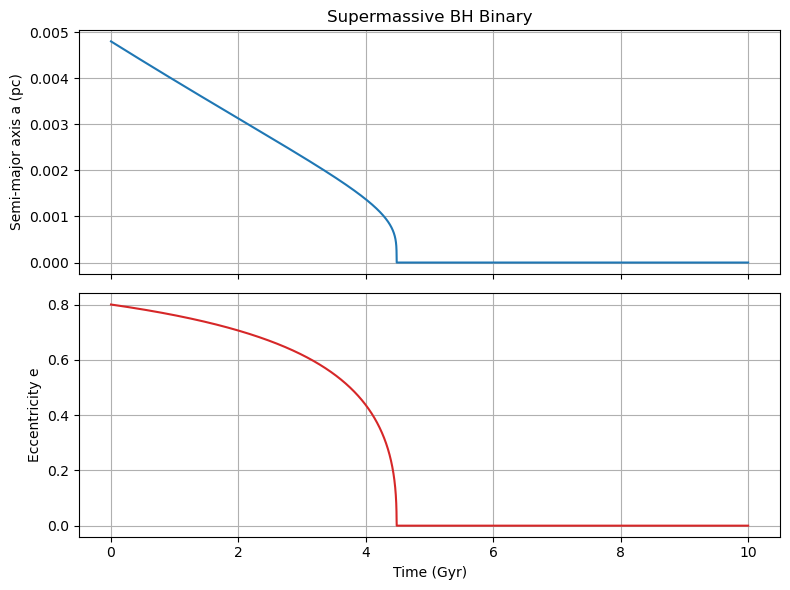

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# ----------------------------
# Physical constants (SI)
# ----------------------------
G = 6.67430e-11
c = 2.99792458e8
Msun = 1.98847e30
AU = 1.495978707e11
pc = 3.085677581e16
Gyr = 1e9 * 365.25 * 24 * 3600

# ----------------------------
# Peters equations
# ----------------------------
def peters_eq(y, t, m1, m2):
    a, e = y
    if a <= 0 or e < 0:
        return [0.0, 0.0]

    beta = G**3 * m1 * m2 * (m1 + m2) / c**5

    da_dt = (
        -64/5 * beta / (a**3 * (1 - e**2)**(7/2)) *
        (1 + 73/24 * e**2 + 37/96 * e**4)
    )

    de_dt = (
        -304/15 * e * beta / (a**4 * (1 - e**2)**(5/2)) *
        (1 + 121/304 * e**2)
    )

    return [da_dt, de_dt]

# ----------------------------
# Time array
# ----------------------------
t = np.linspace(0, 10 * Gyr, 20000)
t_Gyr = t / Gyr

# ----------------------------
# Binary systems
# ----------------------------
systems = [
    {
        "name": "Stellar-mass BH Binary",
        "m1": 20 * Msun,
        "m2": 20 * Msun,
        "a0": 0.2 * AU,
        "e0": 0.6,
        "a_unit": AU,
        "a_label": "Semi-major axis a (AU)"
    },
    {
        "name": "Neutron Star Binary",
        "m1": 1.8 * Msun,
        "m2": 2.0 * Msun,
        "a0": 0.05 * AU,
        "e0": 0.1,
        "a_unit": AU,
        "a_label": "Semi-major axis a (AU)"
    },
    {
        "name": "Supermassive BH Binary",
        "m1": 1e6 * Msun,
        "m2": 1e6 * Msun,
        "a0": 0.0048 * pc,
        "e0": 0.8,
        "a_unit": pc,
        "a_label": "Semi-major axis a (pc)"
    }
]

# ----------------------------
# Solve and plot
# ----------------------------
for s in systems:
    sol = odeint(
        peters_eq,
        [s["a0"], s["e0"]],
        t,
        args=(s["m1"], s["m2"]),
        mxstep=5000
    )

    a = sol[:, 0] / s["a_unit"]
    e = sol[:, 1]

    fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(8, 6), sharex=True
    )

    # a(t)
    ax1.plot(t_Gyr, a, color="tab:blue")
    ax1.set_ylabel(s["a_label"])
    ax1.set_title(s["name"])
    ax1.grid(True)

    # e(t)
    ax2.plot(t_Gyr, e, color="tab:red")
    ax2.set_xlabel("Time (Gyr)")
    ax2.set_ylabel("Eccentricity e")
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Exercise 3 - Compute the evolution of a binary with  $m_1 = 1.8M_o$ and $m_2 = 2M_o$; $a_o = 0.05$ AU. Start from different values of eccentricity and identify its minimum initial value, $e_merg)$, for which the binary merges within 10Gyr. Your answer will rely on visual inspection of the time evolution of a (or e) and will therefore be approximate.

Plot in the same panel the time evolution of a and e for 10 values of $e_o$ around and including $e_merge$. (Use a different line color to illustrate the evolution for each value of $e_o$).

Approximate e_merge ≈ 0.73


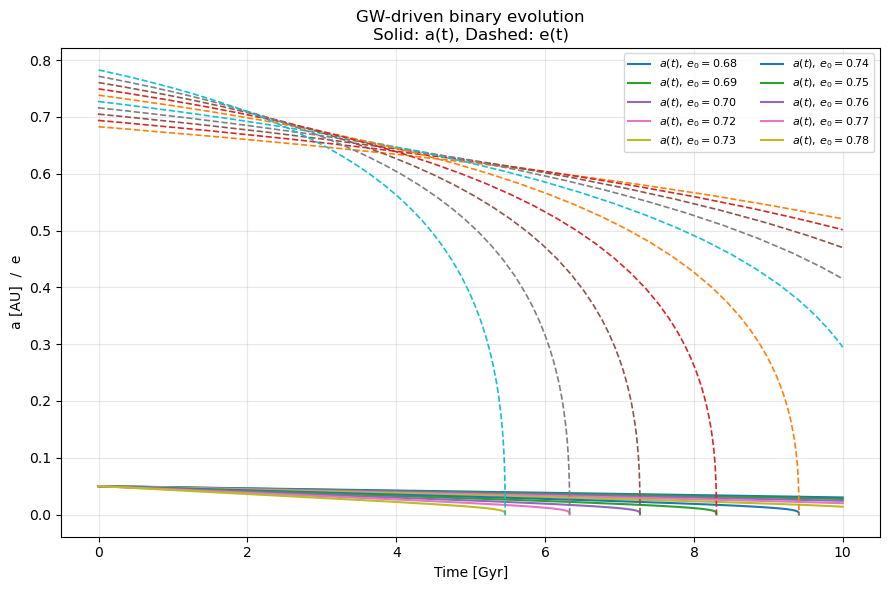

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --------------------------------------------------
# Constants (SI)
# --------------------------------------------------
G = 6.67430e-11
c = 2.99792458e8
Msun = 1.98847e30
AU = 1.495978707e11
yr = 365.25 * 24 * 3600
Gyr = 1e9 * yr

# --------------------------------------------------
# Binary parameters
# --------------------------------------------------
m1 = 1.8 * Msun
m2 = 2.0 * Msun
M = m1 + m2
a0 = 0.05 * AU

# --------------------------------------------------
# Peters equations
# --------------------------------------------------
def peters_equations(t, y):
    a, e = y

    if a <= 0 or e < 0:
        return [0.0, 0.0]

    prefactor = G**3 * m1 * m2 * M / c**5

    da_dt = (
        -64/5 * prefactor / (a**3 * (1 - e**2)**(7/2))
        * (1 + 73/24*e**2 + 37/96*e**4)
    )

    de_dt = (
        -304/15 * e * prefactor / (a**4 * (1 - e**2)**(5/2))
        * (1 + 121/304*e**2)
    )

    return [da_dt, de_dt]

# --------------------------------------------------
# Merger condition (a -> very small)
# --------------------------------------------------
def merger_event(t, y):
    return y[0] - 1e7  # 10 km separation

merger_event.terminal = True
merger_event.direction = -1

# --------------------------------------------------
# Find e_merge approximately
# --------------------------------------------------
def merges_within_10Gyr(e0):
    sol = solve_ivp(
        peters_equations,
        (0, 10 * Gyr),
        [a0, e0],
        events=merger_event,
        rtol=1e-8,
        atol=1e-10
    )
    return sol.status == 1

e_grid = np.linspace(0.01, 0.99, 100)
merge_flags = [merges_within_10Gyr(e) for e in e_grid]

e_merge = e_grid[np.where(merge_flags)[0][0]]
print(f"Approximate e_merge ≈ {e_merge:.2f}")

# --------------------------------------------------
# Choose 10 e0 values around e_merge
# --------------------------------------------------
e0_values = np.linspace(e_merge - 0.05, e_merge + 0.05, 10)
e0_values = np.clip(e0_values, 0.01, 0.99)

# --------------------------------------------------
# Plot a(t) and e(t)
# --------------------------------------------------
plt.figure(figsize=(9, 6))

for e0 in e0_values:
    sol = solve_ivp(
        peters_equations,
        (0, 10 * Gyr),
        [a0, e0],
        events=merger_event,
        rtol=1e-8,
        atol=1e-10
    )

    t = sol.t / Gyr
    a = sol.y[0] / AU
    e = sol.y[1]

    plt.plot(t, a, lw=1.5, label=fr"$a(t),\, e_0={e0:.2f}$")
    plt.plot(t, e, "--", lw=1.2)

plt.xlabel("Time [Gyr]")
plt.ylabel("a [AU]  /  e")
plt.title("GW-driven binary evolution\nSolid: a(t), Dashed: e(t)")
plt.legend(fontsize=8, ncol=2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Exercise 4: Radom walk in eccentricit 

In a dense astrophysical environment such as a cluster of stars or a galactic nucleus, binary systems might be subject to random external perturbations, such as gravitational interactions with other stars. These fluctuations can be approximated as a random walk process, where the eccentricity undergoes small changes at regular time intervals. The purpose of this excercise is to simulate the evolution of a binary star system under the influence of both gravitational wave radiation and external perturbations.

Consider the evolution of the binary's a and e governed by the equations given above. The binary now undergoes a perturbation from a passing star every $change in t = 10$Myr, which prduces an istantenous change

$change in e = u(-0.1,0.1) * (\frac{a}{a_0})^3/2$

where $u(-0.1,0.1)$ is a uniformly distributed random number between -0.1 and 0.1, a is the current semi-major axis of the orbit and $a_0$ its initial value. Remember that $e >= 0$ by definition, so after applying such a perturbation make sure that e remains positive (this can be done by setting 
 if the perturbation produces a negative $e=0$). Start the binary with the following initial conditions $a_0 = 0.3$AU, $e_0 = 0.2$, $m1 = m2 = 20M_o$, and integrate it up to a maximum time of 10Gyr or until it merges due to energy loss by gravitational wave radiation.

Plot the time evolution of e and a for one system and compare it to the evolution of the binary when evolved in isolation (i.e., the case you have considered in the first part of this worksheet).

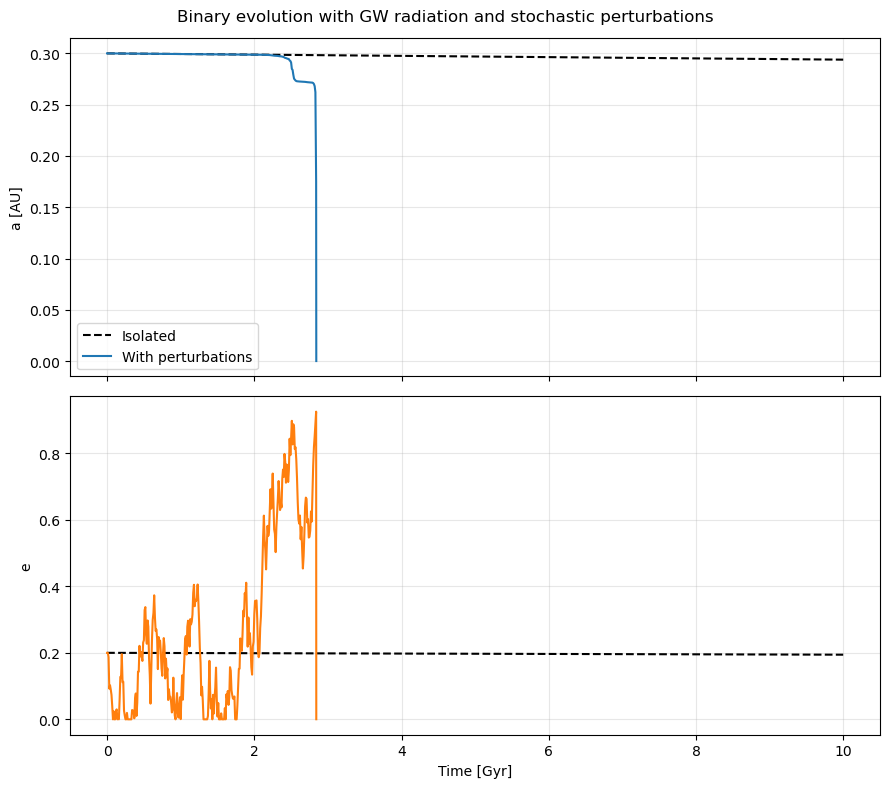

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --------------------------------------------------
# Constants (SI)
# --------------------------------------------------
G = 6.67430e-11
c = 2.99792458e8
Msun = 1.98847e30
AU = 1.495978707e11
yr = 365.25 * 24 * 3600
Myr = 1e6 * yr
Gyr = 1e9 * yr

# --------------------------------------------------
# Binary parameters
# --------------------------------------------------
m1 = 20 * Msun
m2 = 20 * Msun
M = m1 + m2

a0 = 0.3 * AU
e0 = 0.2

# --------------------------------------------------
# Peters equations
# --------------------------------------------------
def peters_eqs(t, y):
    a, e = y
    if a <= 0 or e < 0:
        return [0.0, 0.0]

    pref = G**3 * m1 * m2 * M / c**5

    da_dt = (
        -64/5 * pref / (a**3 * (1 - e**2)**(7/2))
        * (1 + 73/24*e**2 + 37/96*e**4)
    )

    de_dt = (
        -304/15 * e * pref / (a**4 * (1 - e**2)**(5/2))
        * (1 + 121/304*e**2)
    )

    return [da_dt, de_dt]

# --------------------------------------------------
# Merger condition
# --------------------------------------------------
def merger_event(t, y):
    return y[0] - 1e7  # 10 km

merger_event.terminal = True
merger_event.direction = -1

# --------------------------------------------------
# Integration parameters
# --------------------------------------------------
t_max = 10 * Gyr
dt_kick = 10 * Myr
n_steps = int(t_max / dt_kick)

# --------------------------------------------------
# Storage arrays
# --------------------------------------------------
t_rw = [0.0]
a_rw = [a0]
e_rw = [e0]

t_iso = [0.0]
a_iso = [a0]
e_iso = [e0]

# --------------------------------------------------
# RANDOM WALK EVOLUTION
# --------------------------------------------------
np.random.seed(2)

a, e = a0, e0
t_current = 0.0

for _ in range(n_steps):

    sol = solve_ivp(
        peters_eqs,
        (t_current, t_current + dt_kick),
        [a, e],
        events=merger_event,
        rtol=1e-8,
        atol=1e-10
    )

    t_current = sol.t[-1]
    a, e = sol.y[0, -1], sol.y[1, -1]

    t_rw.append(t_current)
    a_rw.append(a)
    e_rw.append(e)

    if sol.status == 1:
        break

    # --- apply eccentricity kick ---
    delta_e = np.random.uniform(-0.1, 0.1) * (a / a0)**(3/2)
    e = max(e + delta_e, 0.0)

# --------------------------------------------------
# ISOLATED EVOLUTION
# --------------------------------------------------
sol_iso = solve_ivp(
    peters_eqs,
    (0, t_max),
    [a0, e0],
    events=merger_event,
    rtol=1e-8,
    atol=1e-10
)

t_iso = sol_iso.t
a_iso = sol_iso.y[0]
e_iso = sol_iso.y[1]

# --------------------------------------------------
# Plot
# --------------------------------------------------
fig, ax = plt.subplots(2, 1, figsize=(9, 8), sharex=True)

ax[0].plot(np.array(t_iso)/Gyr, a_iso/AU, 'k--', label="Isolated")
ax[0].plot(np.array(t_rw)/Gyr, np.array(a_rw)/AU, 'C0', label="With perturbations")
ax[0].set_ylabel("a [AU]")
ax[0].legend()
ax[0].grid(alpha=0.3)

ax[1].plot(np.array(t_iso)/Gyr, e_iso, 'k--', label="Isolated")
ax[1].plot(np.array(t_rw)/Gyr, np.array(e_rw), 'C1', label="With perturbations")
ax[1].set_ylabel("e")
ax[1].set_xlabel("Time [Gyr]")
ax[1].grid(alpha=0.3)

plt.suptitle("Binary evolution with GW radiation and stochastic perturbations")
plt.tight_layout()
plt.show()

